In [60]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Creating our sentences to train the word vectors

In [62]:
TextCorpus  = ["I like Datatrained",
               "Datatrained has a good ML program",
               "Datatrained has good faculty",
               "Chidri is that good faculty",
               "I like ML"
]

In [63]:
text_tokens = [sent.split() for sent in TextCorpus]
text_tokens[:2]

[['I', 'like', 'Datatrained'],
 ['Datatrained', 'has', 'a', 'good', 'ML', 'program']]

#### Training the word vectors

In [64]:
model = Word2Vec(text_tokens,min_count=1)

In [6]:
model.wv['ML']

array([ 3.1387284e-03,  2.2419910e-03,  4.8930212e-03, -1.6704389e-03,
        2.4190464e-03, -4.5577488e-03, -1.0036449e-03,  4.8325327e-03,
        1.2296948e-03, -3.6677406e-03,  4.8877178e-03,  3.3846116e-03,
       -3.3709262e-03, -3.2977471e-03, -4.2566849e-04,  6.6928298e-04,
        3.9162464e-03, -5.9055531e-04,  2.6945113e-03, -2.9985649e-03,
       -3.1141380e-03, -4.5639677e-03,  2.3680551e-03, -1.7259689e-03,
       -4.0792068e-03, -3.6043408e-03,  4.4013890e-05, -6.4938463e-04,
       -2.9125982e-03, -2.4409075e-05,  3.2212029e-03,  2.0272199e-03,
        3.1653789e-04,  3.1774582e-03, -4.0998897e-03, -2.5815109e-04,
       -8.4630039e-04, -3.7402611e-03, -4.2012483e-03, -3.1393846e-03,
       -9.1324764e-04,  2.9439307e-04, -3.4716686e-03, -3.7101321e-03,
       -1.5644111e-03, -3.9165607e-04, -1.5395277e-03,  4.7119113e-04,
       -5.2225620e-05,  4.4774809e-03, -3.1574084e-03,  4.3074568e-03,
       -2.7924741e-03,  2.1084836e-03, -8.6545397e-04, -4.3014819e-03,
      

In [7]:
len(model.wv['ML'])

100

Similarity between word vectors is measures using Cosine similarity

In [8]:
model.wv.most_similar("faculty",topn=5)

[('ML', 0.16236549615859985),
 ('has', 0.04316381365060806),
 ('a', 0.04151538759469986),
 ('Datatrained', 0.008727449923753738),
 ('Chidri', -0.0030212029814720154)]

### Training our word vectors on the text8 corpus
Cleaned Wikipedia text, compressed to 100MB

#### Importing the raw text file

In [16]:
sentences = word2vec.Text8Corpus('/content/text8.txt')

In [17]:
type(sentences)

gensim.models.word2vec.Text8Corpus

#### Using all default parameters

In [18]:
model = Word2Vec(sentences)

In [24]:
model.wv.most_similar("earn")

[('hmo', 0.837553858757019),
 ('acq', 0.8127716779708862),
 ('ship', 0.7494685649871826),
 ('morrison', 0.7213780879974365),
 ('money-fx', 0.6561301350593567),
 ('revises', 0.6425221562385559),
 ('rd', 0.6391134858131409),
 ('micron', 0.634442150592804),
 ('odeon', 0.6234796047210693),
 ('trustco', 0.6134059429168701)]

In [25]:
model.wv.most_similar("agency")

[('aide', 0.928234338760376),
 ('study', 0.9253981113433838),
 ('refiner', 0.9194349646568298),
 ('visnews', 0.9143259525299072),
 ('press', 0.9143052697181702),
 ('newspaper', 0.9132089614868164),
 ('nationally', 0.9091496467590332),
 ('wang', 0.9087539911270142),
 ('news', 0.9070839881896973),
 ('tamura', 0.9024093151092529)]

#### Semantic regularities captured in word embeddings

In [26]:
model.wv.most_similar(positive=['economy', 'balance'], negative=['money'], topn=5)

[('highest', 0.8396015167236328),
 ('improvement', 0.8369107842445374),
 ('program', 0.8337936401367188),
 ('reduction', 0.831845223903656),
 ('expectation', 0.8287167549133301)]

In [30]:
model.wv.most_similar(positive=['mln', 'cts'], negative=['man'], topn=5)

[('rand', 0.8400643467903137),
 ('income', 0.77846759557724),
 ('extraordinary', 0.7549663782119751),
 ('divs', 0.7537475824356079),
 ('debit', 0.7466387748718262)]

### Visualizing these word vectors

In [31]:
X = model.wv[model.wv.vocab]

##### We'll use PCA to reduce and visualize in 2 dimensions

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Randomly select 100 words

In [34]:
import random
random.seed(2)

In [35]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]

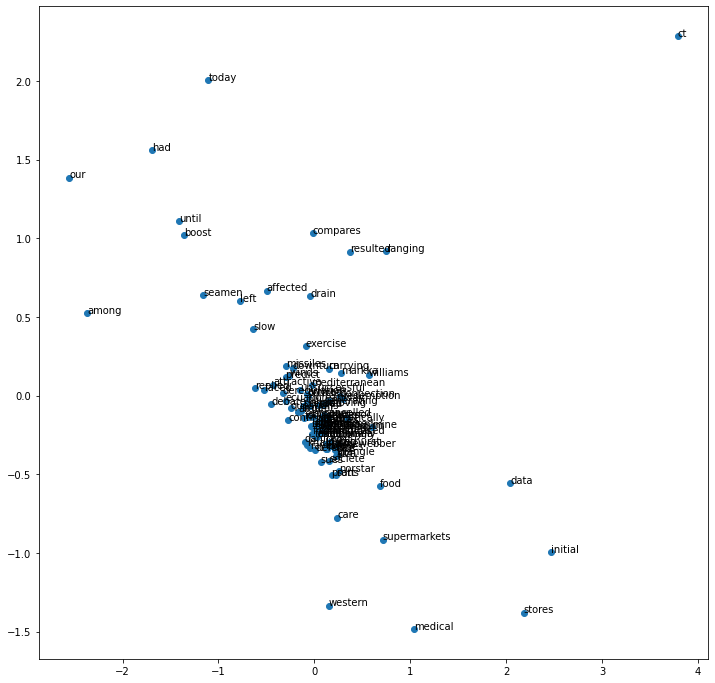

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

## Effect of vector dimension

#### Reducing the length to 50

In [37]:
model = Word2Vec(sentences, size=50)

In [38]:
model.wv.most_similar("money")

[('liquidity', 0.9164514541625977),
 ('assistance', 0.9056518077850342),
 ('currency', 0.889063835144043),
 ('shortage', 0.8668283224105835),
 ('help', 0.8558347225189209),
 ('bundesbank', 0.8520323038101196),
 ('market', 0.8505517244338989),
 ('maturing', 0.8418864607810974),
 ('some', 0.8324851393699646),
 ('stability', 0.8313694596290588)]

In [40]:
model.wv.most_similar("earn", topn=5)

[('acq', 0.8364033102989197),
 ('ship', 0.7693830132484436),
 ('money-fx', 0.6492695212364197),
 ('labatt', 0.6258071660995483),
 ('st', 0.6117599606513977)]

In [41]:
model = word2vec.Word2Vec(sentences, size = 300)

In [42]:
model.wv.most_similar("money")

[('assistance', 0.9260922074317932),
 ('liquidity', 0.9153803586959839),
 ('market', 0.9124151468276978),
 ('currency', 0.88187575340271),
 ('shortage', 0.8681497573852539),
 ('help', 0.861789882183075),
 ('dealers', 0.8499053120613098),
 ('dollars', 0.8430290222167969),
 ('dollar', 0.8374047875404358),
 ('bundesbank', 0.8339415192604065)]

In [44]:
model.wv.most_similar("man")

[('toledo', 0.9788537621498108),
 ('apt', 0.9737744331359863),
 ('welsh', 0.9734914302825928),
 ('expert', 0.9731165170669556),
 ('broadcast', 0.9723236560821533),
 ('replace', 0.9722235202789307),
 ('schedule', 0.9705138206481934),
 ('jeep', 0.9703295230865479),
 ('tonight', 0.9702895879745483),
 ('operator', 0.9701366424560547)]

In [46]:
model.wv.most_similar(positive=['earn', 'forman'], negative=['man'], topn=5)

[('swissair', 0.716180682182312),
 ('harding', 0.6392403244972229),
 ('acq', 0.6310409903526306),
 ('st', 0.6288343667984009),
 ('micron', 0.6058750748634338)]

## Skip gram vs CBOW

Simply put, the CBOW model learns the embedding by predicting the current word based on its context. The skip-gram model learns by predicting the surrounding words given a current word.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png)

#### Using Skipgram method

## Word vectors trained on different contexts
 - We'll load different corpora, from different contexts and see how the embeddings vary
 - The text8 corpus is wikipedia pages, while Brown corpus is from 15 different topics, and movie reviews are from IMDB

In [51]:
from nltk.corpus import brown, movie_reviews
nltk.download('brown')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [53]:
model_brown = Word2Vec(brown.sents(), sg=1)   #sg = skipgram = 1
model_movie = Word2Vec(movie_reviews.sents(), sg=1, window=5)  #window =5  no of skips =5

In [57]:
model.wv.most_similar('money', topn=5)

[('assistance', 0.9260922074317932),
 ('liquidity', 0.9153803586959839),
 ('market', 0.9124151468276978),
 ('currency', 0.88187575340271),
 ('shortage', 0.8681497573852539)]

In [55]:
model_brown.wv.most_similar('money', topn=5)

[('care', 0.8472272753715515),
 ('job', 0.8446465134620667),
 ('friendship', 0.8426235318183899),
 ('permission', 0.8276019096374512),
 ('risk', 0.822577953338623)]

In [56]:
model_movie.wv.most_similar('money', topn=5)

[('cash', 0.7532727122306824),
 ('risk', 0.7248156070709229),
 ('ransom', 0.7231743335723877),
 ('record', 0.7030945420265198),
 ('bucks', 0.6959776282310486)]

 
I hope it’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. 

## Using pre-trained word vectors

### A quick note on Glove:
   - Developed by Stanford by training on 6 Billion tokens
   - Objective is slightly different
   - End result very similar to Google's word2vec

https://nlp.stanford.edu/projects/glove/

- We'll use the 100D vectors for this example.
- The trained vectors are available in a text file
- The format is slightly different from that of word2vec, necessitating the use of a utility to format accordingly

In [65]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.w2vformat.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

In [66]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("glove.6B.100d.w2vformat.txt", binary=False)

#### Now you can use all the methods you used with word2vec models

In [ ]:
glove_model.most_similar("king")

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020887732505798),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811410188674927),
 ('father', 0.680202841758728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [ ]:
glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543)]

In [ ]:
glove_model.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.7324979305267334),
 ('heroes', 0.6356217861175537),
 ('icon', 0.6185224056243896),
 ('beloved', 0.6136684417724609),
 ('herself', 0.5904075503349304)]